## Customer Churn occurs when subscribers or customers stop doing business with a company or service. A business typically treats a customer as churned once a specific amount of time has passed since the customers last interaction with the business or service.

## Predicting which customers are likely to leave the bank in the future can have both tangible and intangible effect on the organization.

## Machine learning algorithms can be used to predict churn for bank customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data

In [2]:
df=pd.read_csv("Customer Churn Bank .csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Data has zero null values

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# EDA

## Target Variable
#### 1 Stands for Exit
#### 0 Stands for Non Exit

0    7963
1    2037
Name: Exited, dtype: int64


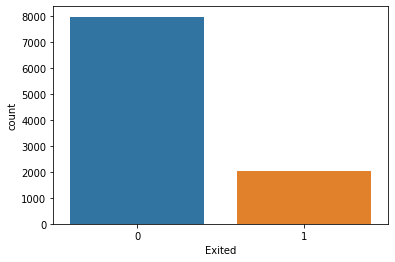

In [7]:
sns.countplot(df.Exited)
print(df.Exited.value_counts())

## Single Variate Analysis

Gender Count

Male      5457
Female    4543
Name: Gender, dtype: int64


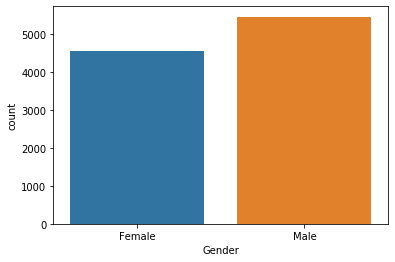

In [8]:
sns.countplot(df.Gender)
print(df.Gender.value_counts())

Has a credit card or not

1    7055
0    2945
Name: HasCrCard, dtype: int64


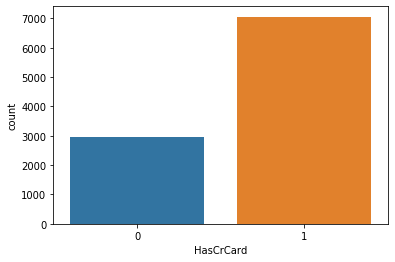

In [9]:
sns.countplot(df.HasCrCard)
print(df.HasCrCard.value_counts())

Active Member of bank or not

1    5151
0    4849
Name: IsActiveMember, dtype: int64


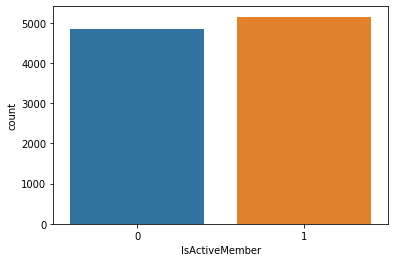

In [10]:
sns.countplot(df.IsActiveMember)
print(df.IsActiveMember.value_counts())

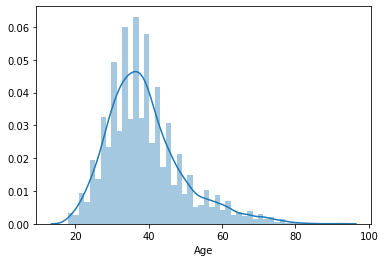

In [11]:
sns.distplot(df.Age)

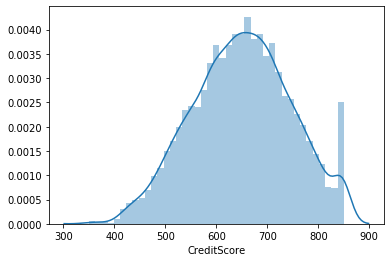

In [12]:
sns.distplot(df.CreditScore)

Tenure count

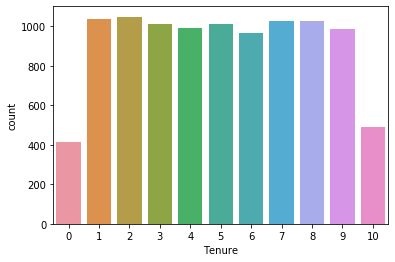

In [13]:
sns.countplot(df.Tenure)

Number of products 

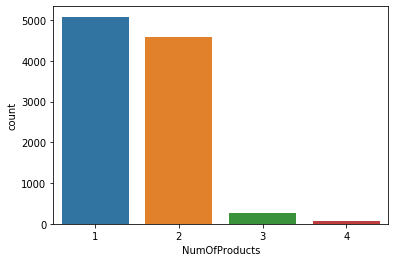

In [14]:
sns.countplot(df.NumOfProducts)

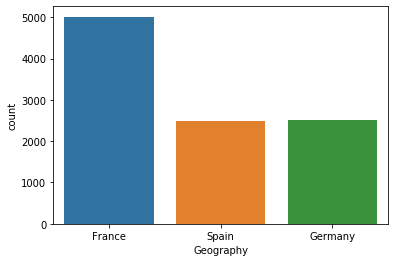

In [15]:
sns.countplot(df.Geography)

## BI Variate Analysis

Gender count VS Churned

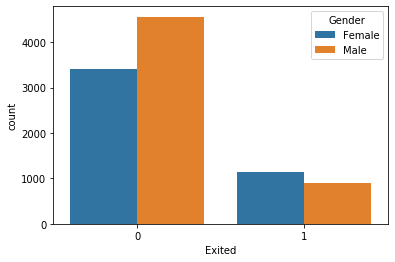

In [16]:
sns.countplot(x = 'Exited', hue = 'Gender', data = df)
plt.show()

Area VS Churned

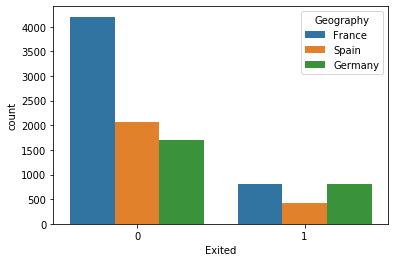

In [17]:
sns.countplot(x = 'Exited', hue = 'Geography', data = df)
plt.show()

Age VS Churned

<function matplotlib.pyplot.show(*args, **kw)>

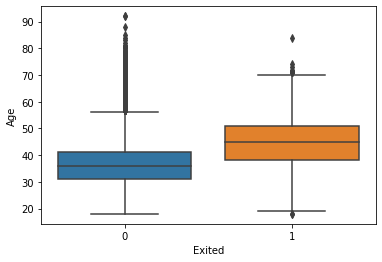

In [18]:
sns.boxplot( y = df.Age,  x = df.Exited)
plt.show

Credit score VS Churned

<function matplotlib.pyplot.show(*args, **kw)>

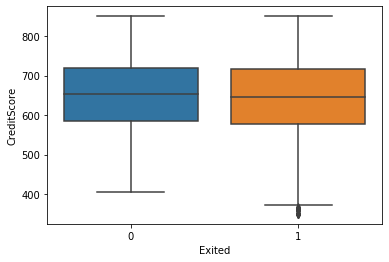

In [19]:
sns.boxplot( y = df.CreditScore,  x = df.Exited)
plt.show

Tenure VS Churned

<function matplotlib.pyplot.show(*args, **kw)>

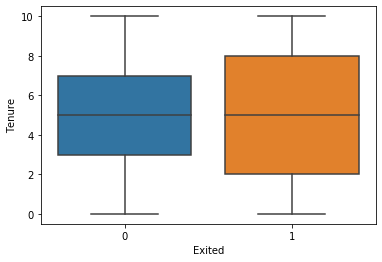

In [20]:
sns.boxplot( y = df.Tenure,  x = df.Exited)
plt.show

Number of products VS Churned

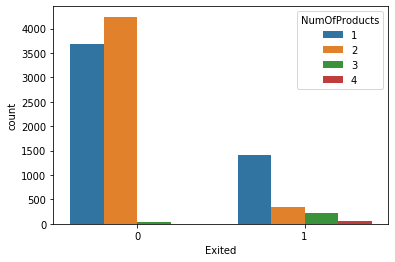

In [21]:
sns.countplot(x = 'Exited', hue = 'NumOfProducts', data = df)
plt.show()

Active Member VS Churned

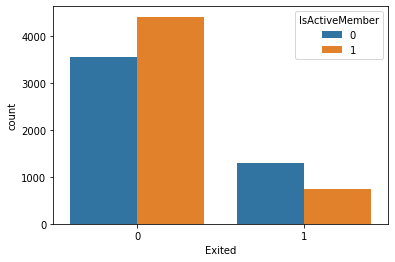

In [22]:
sns.countplot(x = 'Exited', hue = 'IsActiveMember', data = df)
plt.show()

### Correlation Matrix

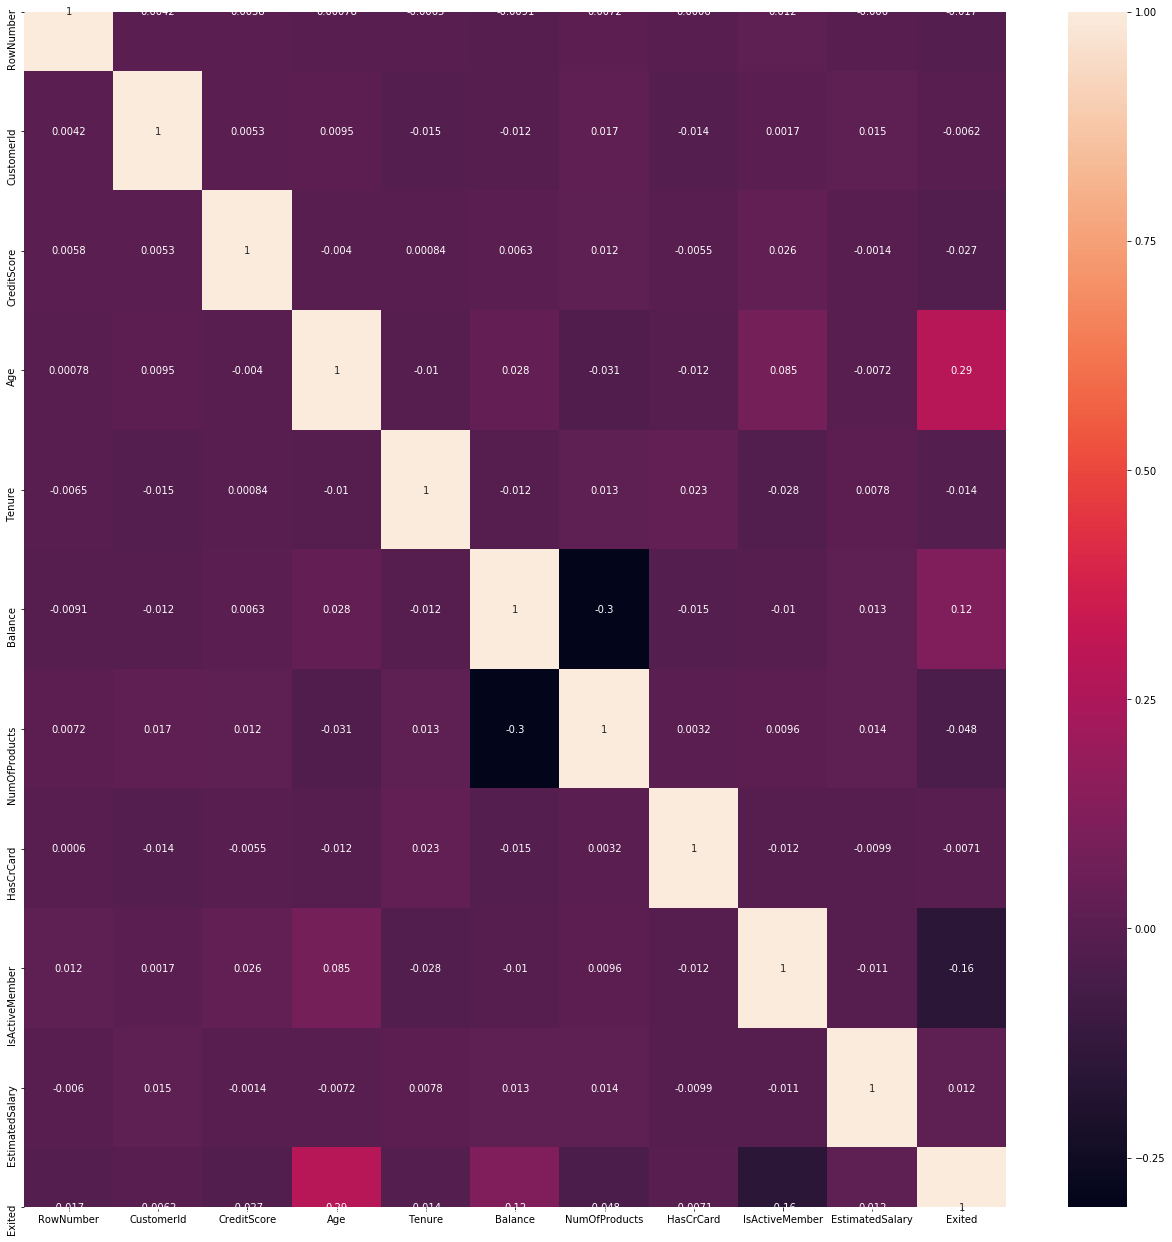

In [23]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(22,22))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

## Encoding the Categorical Data

In [24]:
Geography = pd.get_dummies(df.Geography, drop_first = True)
Gender = pd.get_dummies(df.Gender, drop_first = True)
df = pd.concat([df, Geography, Gender], axis = 1)

In [25]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,0,1


## Spliting into Training and Testing Data

In [26]:
X=df.drop(['RowNumber', 'CustomerId', 'Surname', "Geography","Gender",'Exited'],axis=1)
y=(df["Exited"])

In [27]:
y = y.values.reshape(len(y),1)
print(X.shape, y.shape)

(10000, 11) (10000, 1)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [29]:
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')

## Feature Importance

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\parva\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor()

In [31]:
print(model.feature_importances_)

[0.12005807 0.23940462 0.10421035 0.12942358 0.14071222 0.03120602
 0.0430217  0.11872157 0.02891026 0.02167957 0.02265204]


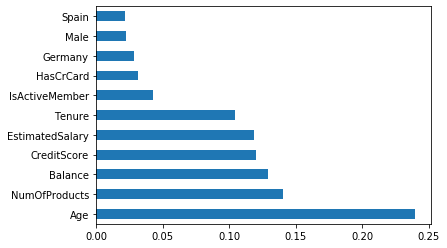

In [32]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

# Model Building

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report

In [34]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [35]:
predictions = model.predict(X_train)

In [36]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 78.99%


In [37]:
pred = model.predict(X_test)

In [38]:
accuracy_score(y_test,pred)

0.789

Using Logistic Regression accuracy, on training data is 78.99%  and accuracy on testing data is 78.9%

### Gaussian Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
model = GaussianNB() 
model.fit(X_train,y_train)

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [41]:
predictions = model.predict(X_train)

In [42]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 78.56%


In [43]:
pred = model.predict(X_test)


In [44]:
accuracy_score(y_test,pred)

0.785

Using Gaussian Naive Bayes, accuracy on training data is 78.56% and accuracy on testing data is 78.5%

### KNN Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1,50)}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

{'n_neighbors': 36}

In [47]:
model = KNeighborsClassifier(n_neighbors=36)
model.fit(X_train,y_train)

C:\Users\parva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(n_neighbors=36)

In [48]:
predictions = model.predict(X_train)

In [49]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 79.61%


In [50]:
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.7965

Using KNN ,accuracy on training data is 79.61% and accuracy on testing data is 79.65%

### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [52]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train) 

DecisionTreeClassifier()

In [53]:
predictions = model.predict(X_train)

In [54]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 100.00%


In [55]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.7975

Accuracy of training data is very high as compared to testing data ,hence its a case of overfitting

In [56]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'criterion':['gini','entropy'], 'max_depth': [3,5,7,20, 30]}

gs_inst = GridSearchCV(model,param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 20, 30]})

In [57]:
gs_inst.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [58]:
model = DecisionTreeClassifier(criterion='entropy',max_depth= 7)
model.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [59]:
predictions = model.predict(X_train)

In [60]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 87.04%


In [61]:
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.8545

Using Decision Tree,accuracy on training data is 87.02% and accuracy on testing data is 85.35%

### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

C:\Users\parva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [64]:
predictions = model.predict(X_train)

In [65]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 100.00%


In [66]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.868

Hence a clear case of overfittng

#### Hyper-parameter Tuning

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [69]:

#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [70]:
model = RandomForestClassifier(**{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 66,
 'bootstrap': True})

In [71]:
model.fit(X_train, y_train)

C:\Users\parva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=66, max_features='sqrt', min_samples_split=10,
                       n_estimators=1200)

In [72]:
predictions = model.predict(X_train)

In [73]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 93.12%


In [74]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.8675

Using Random Forest ,accuracy on training data is 93.16% and accuracy on testing data is 86.75%

### Gradient Boosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier


In [82]:
model= GradientBoostingClassifier(n_estimators=1200, learning_rate=0.1, max_depth=3, random_state=0)

In [83]:
model.fit(X_train,y_train)

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(n_estimators=1200, random_state=0)

In [84]:
predictions = model.predict(X_train)

In [85]:
accuracy = metrics.accuracy_score(predictions,y_train)
print('Accuracy : %s' % '{0:.2%}'.format(accuracy))

Accuracy : 94.39%


In [86]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.854

Using Gradient Boosting ,accuracy on training data is 94.39% and accuracy on testing data is 85.4%